# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

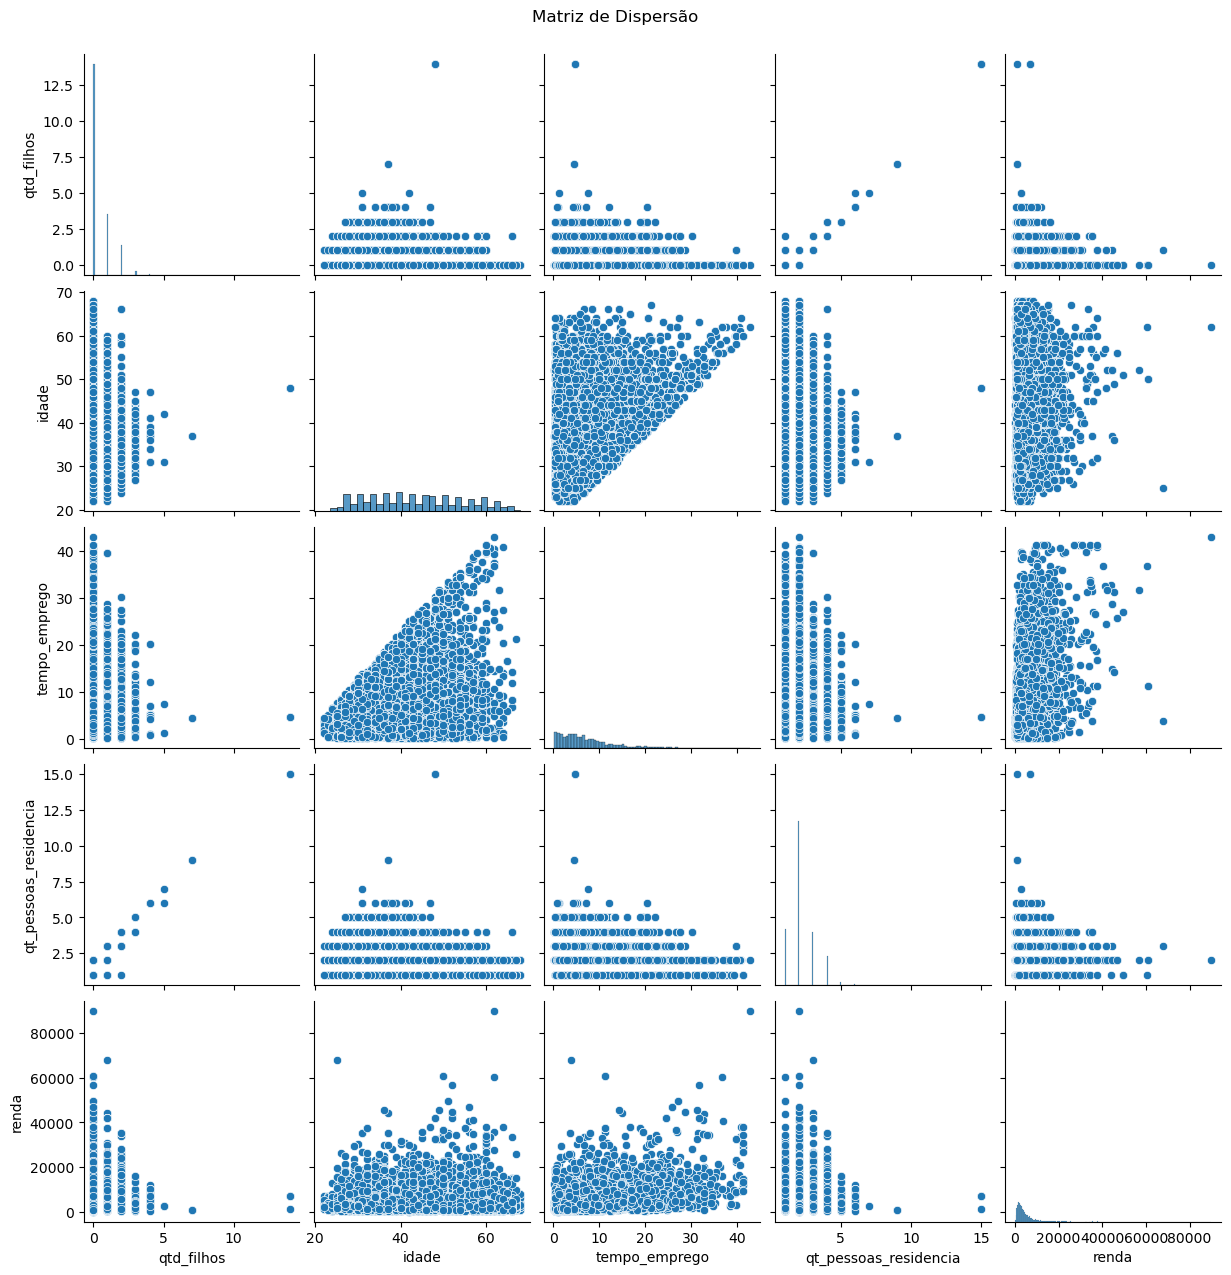

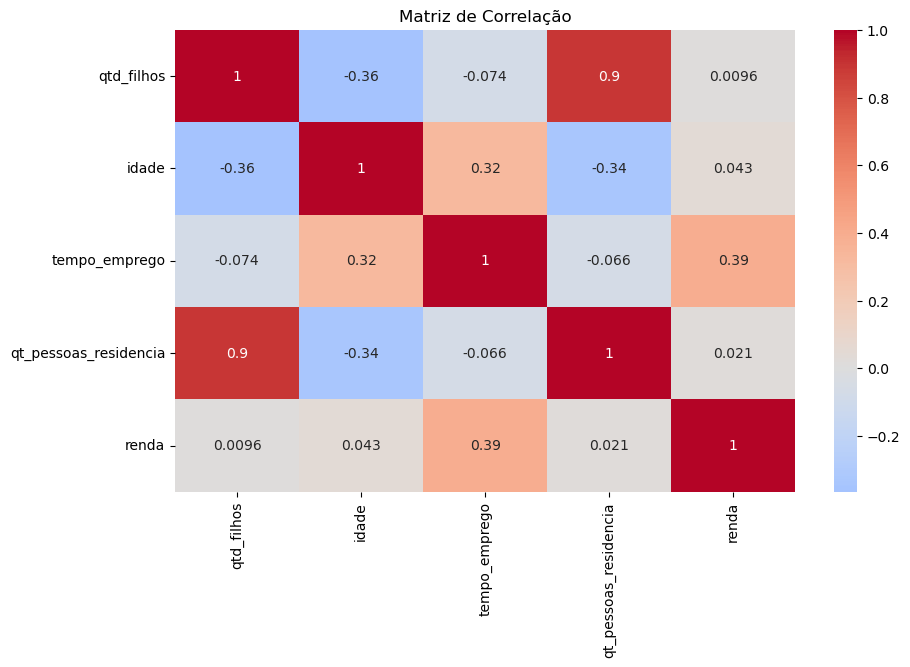

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o arquivo CSV no DataFrame
df = pd.read_csv('previsao_de_renda.csv')

# Selecionar variáveis quantitativas
quantitative_vars = df[['qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia', 'renda']]

# Criar a matriz de dispersão (pairplot)
sns.pairplot(quantitative_vars)
plt.suptitle("Matriz de Dispersão", y=1.02)
plt.show()

# Criar a matriz de correlação e exibir com mapa de calor
correlation_matrix = quantitative_vars.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correlação")
plt.show()


##### Matriz de Dispersão: #####
Mostra a relação entre as variáveis quantitativas como idade, quantidade de filhos, tempo de emprego, quantidade de pessoas na residência e renda. Alguns padrões podem ser observados, como a possível correlação entre idade e renda ou entre tempo de emprego e renda.

##### Matriz de Correlação: #####
Exibe os coeficientes de correlação entre essas variáveis. A correlação mais forte parece ocorrer entre idade e tempo de emprego (o que faz sentido, pois pessoas mais velhas tendem a ter mais anos de trabalho). Também pode haver uma relação moderada entre renda e tempo de emprego.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

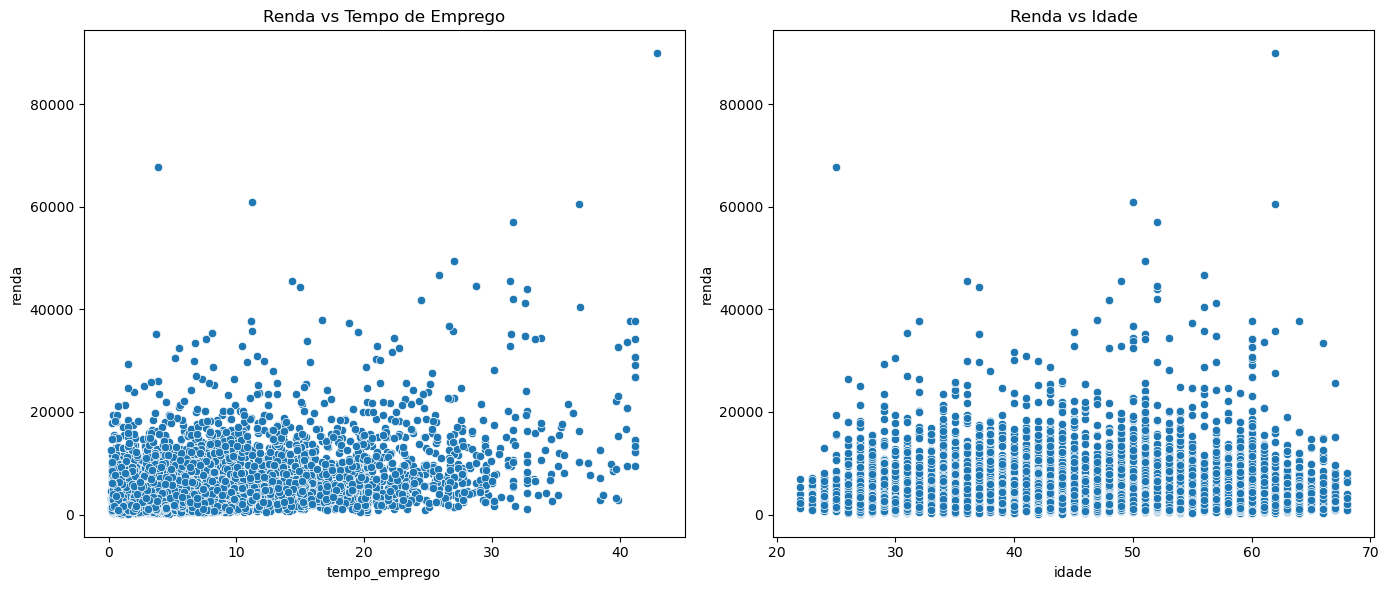

In [6]:
# Criar gráficos de dispersão para as duas variáveis mais correlacionadas com a renda
plt.figure(figsize=(14, 6))

# Scatterplot para tempo_emprego vs renda
plt.subplot(1, 2, 1)
sns.scatterplot(x='tempo_emprego', y='renda', data=df)
plt.title("Renda vs Tempo de Emprego")

# Scatterplot para idade vs renda
plt.subplot(1, 2, 2)
sns.scatterplot(x='idade', y='renda', data=df)
plt.title("Renda vs Idade")

plt.tight_layout()
plt.show()

3) Na su aopinião, há outliers na variável renda?

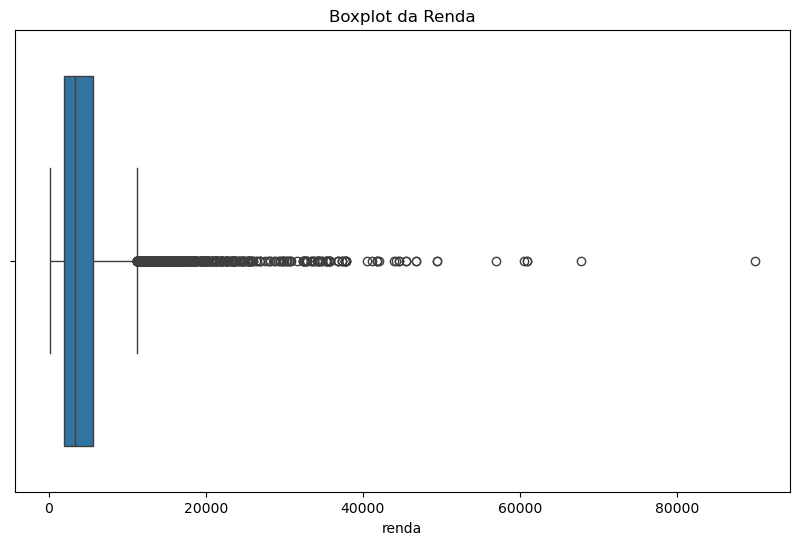

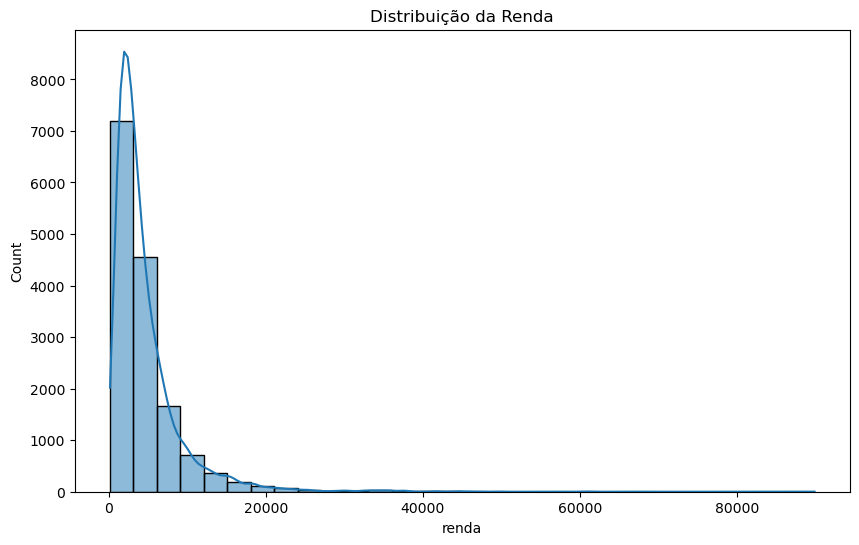

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Criar um boxplot para a variável 'renda'
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['renda'])
plt.title("Boxplot da Renda")
plt.show()

# Criar um histograma para a variável 'renda'
plt.figure(figsize=(10, 6))
sns.histplot(df['renda'], kde=True, bins=30)
plt.title("Distribuição da Renda")
plt.show()

Os gráficos mostram que existem outliers na variável renda. No boxplot, há vários pontos fora dos "bigodes", indicando que algumas rendas são bem mais altas que o normal, especialmente a partir de 20.000.

O histograma também confirma isso, com uma cauda longa à direita, ou seja, poucas pessoas ganham muito mais que a maioria.

Resumindo: os gráficos deixam claro que há alguns valores de renda bem fora do padrão.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

     renda  log_renda
0  3369.24   8.122739
1  6096.14   8.715575
2  5658.98   8.641176
3  7246.69   8.888438
4  4017.37   8.298632


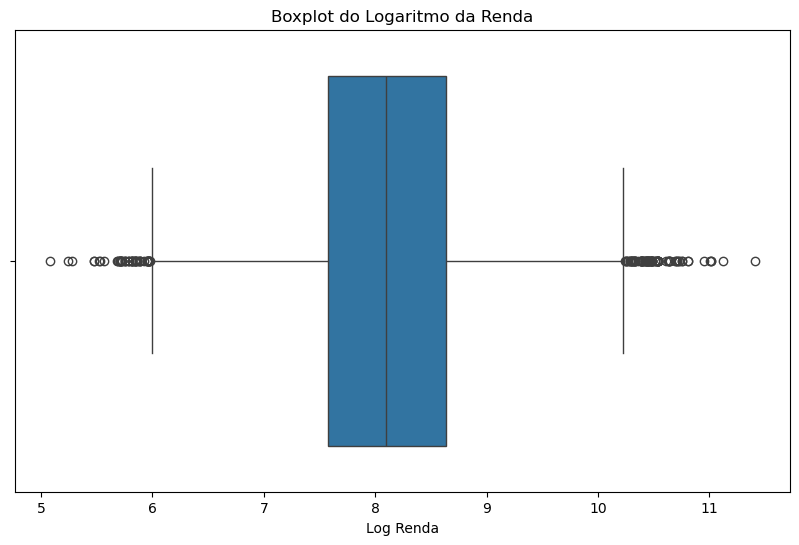

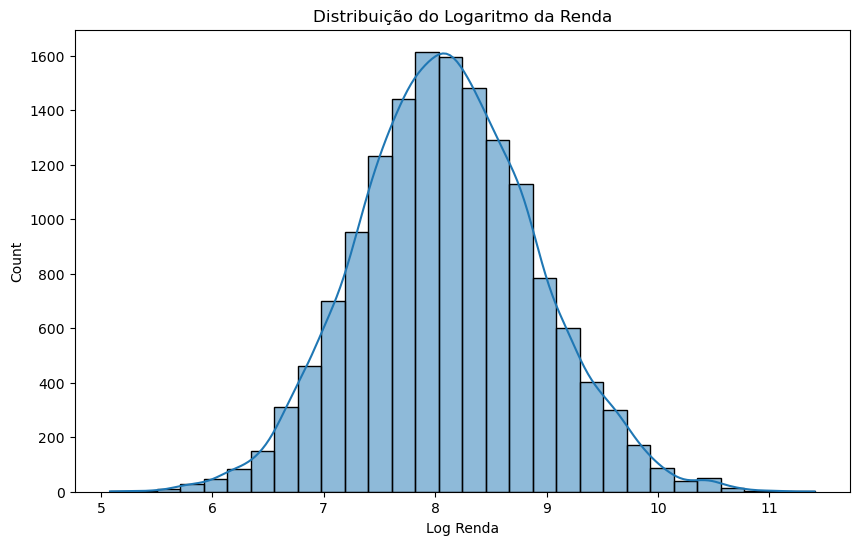

In [13]:
# Calcular o logaritmo da variável 'renda'
import numpy as np
df['log_renda'] = np.log(df['renda'] + 1)  # Adiciona 1 para evitar log(0)

# Verificar as primeiras linhas da nova coluna 'log_renda'
print(df[['renda', 'log_renda']].head())

# Boxplot do logaritmo da renda
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['log_renda'])
plt.title("Boxplot do Logaritmo da Renda")
plt.xlabel("Log Renda")
plt.show()

# Histograma do logaritmo da renda
plt.figure(figsize=(10, 6))
sns.histplot(df['log_renda'], kde=True, bins=30)
plt.title("Distribuição do Logaritmo da Renda")
plt.xlabel("Log Renda")
plt.show()


5) A aplicação do LOG você acha que melhorou ou piorou a análise?

 A transformação com log deixou a análise mais limpa e organizada, o que facilita tirar conclusões mais precisas.